<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

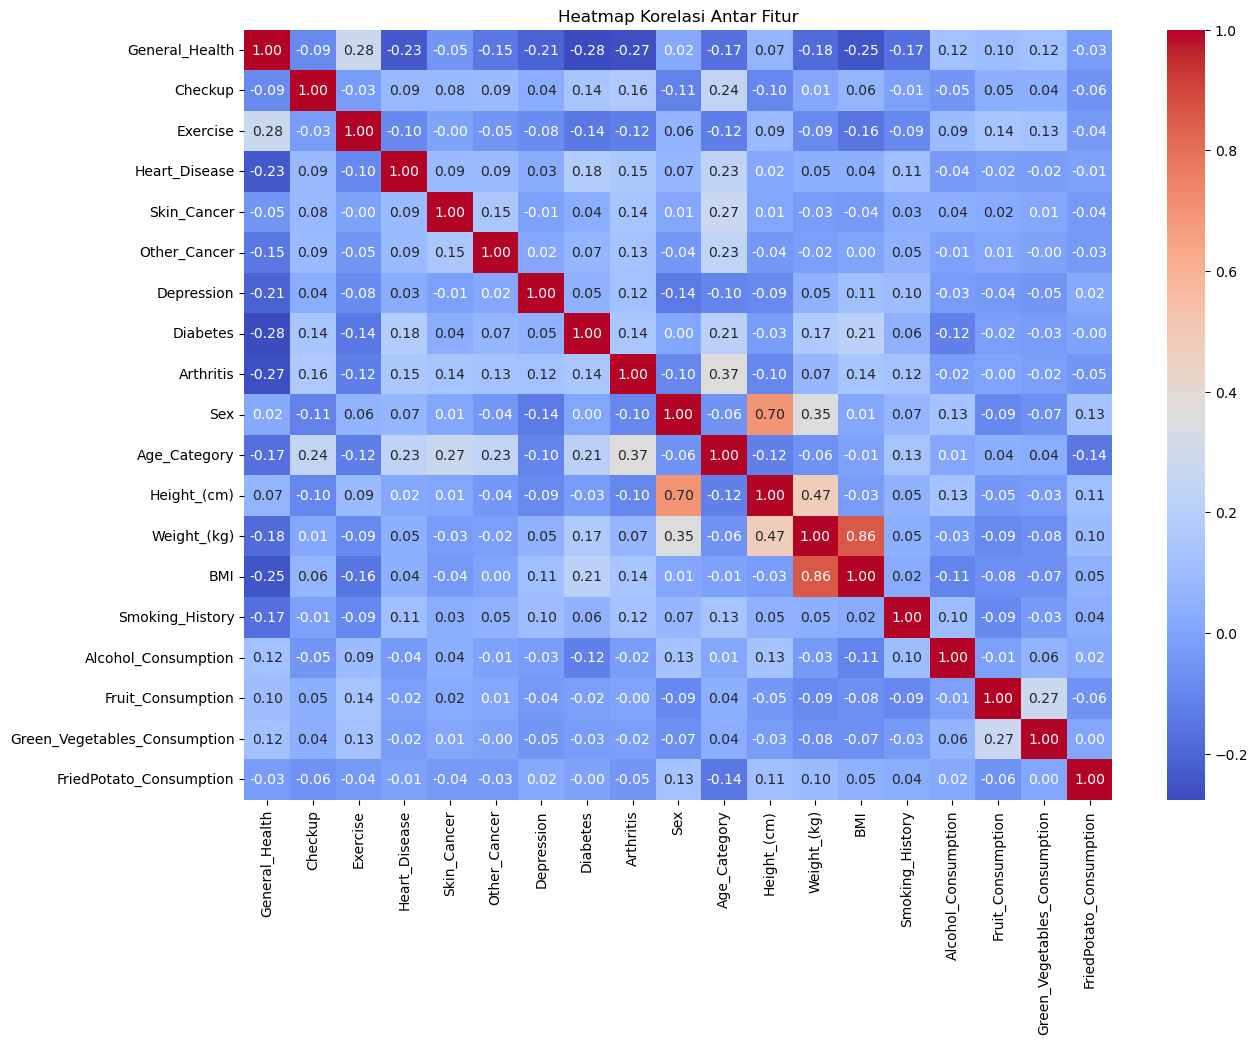

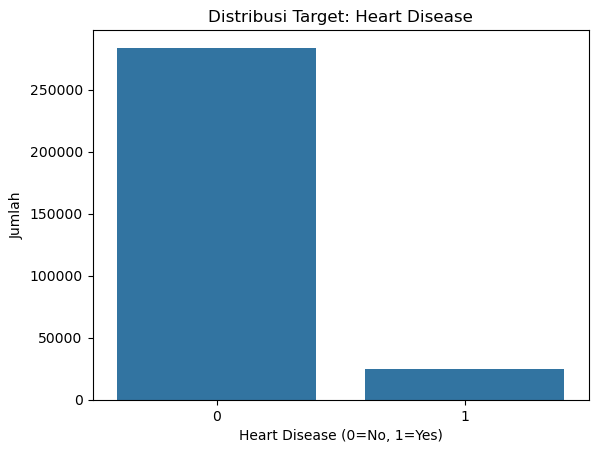

✅ Dataset berhasil disimpan ke cleaned_heart_disease.csv


In [ ]:

# 📦 IMPORT LIBRARY
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import OrdinalEncoder

# 📂 LOAD DATA
df = pd.read_csv('CVD_cleaned.csv')

# 🧹 CEK DATA AWAL
print(df.info())
print("\nMissing values per kolom:\n", df.isnull().sum())
print("\nNilai unik pada tiap kolom:\n")
for col in ['General_Health', 'Checkup', 'Diabetes']:
    print(f"{col}: {df[col].unique()}")

# 🔢 DEFINISI URUTAN ORDINAL
health_order = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']
checkup_order = ['Never', '5 or more years ago', 'Within the past 5 years', 'Within the past 2 years', 'Within the past year']
age_order = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49',
             '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']

# 🎯 ENCODING ORDINAL FEATURES
oe = OrdinalEncoder(categories=[health_order, checkup_order])
df[['General_Health', 'Checkup']] = oe.fit_transform(df[['General_Health', 'Checkup']])

df['Age_Category'] = OrdinalEncoder(categories=[age_order]).fit_transform(df[['Age_Category']])

# 🧠 ENCODING DIABETES (semi-ordinal logic)
diabetes_map = {
    'Yes': 1,
    'No': 0,
    'No, pre-diabetes or borderline diabetes': 0.5,
    'Yes, but female told only during pregnancy': 0.75
}
df['Diabetes'] = df['Diabetes'].map(diabetes_map)

# ✅ ENCODING BINARY KATEGORI LAINNYA
binary_map = {'Yes': 1, 'No': 0}
binary_cols = ['Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer',
               'Depression', 'Arthritis', 'Smoking_History']

for col in binary_cols:
    df[col] = df[col].map(binary_map)

df['Sex'] = df['Sex'].map({'Male': 1, 'Female': 0})

# ✅ CEK NILAI YANG MASIH NULL SETELAH ENCODING
null_counts = df.isnull().sum()
print("\nMissing value setelah mapping:\n", null_counts[null_counts > 0])

# 📊 STATISTIK DESKRIPTIF
print("\nStatistik deskriptif:")
print(df.describe())

# 🔥 HEATMAP KORELASI
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

# 📈 DISTRIBUSI TARGET (Heart Disease)
sns.countplot(x='Heart_Disease', data=df)
plt.title("Distribusi Target: Heart Disease")
plt.xlabel("Heart Disease (0=No, 1=Yes)")
plt.ylabel("Jumlah")
plt.show()

# 🧠 VISUALISASI INTERAKTIF: Age vs BMI berdasarkan Heart Disease
fig = px.scatter(df, x="Age_Category", y="BMI", color="Heart_Disease",
                 title="Distribusi Usia vs BMI Berdasarkan Heart Disease",
                 labels={"Heart_Disease": "Heart Disease"})
fig.show()

# 💾 SIMPAN DATA HASIL CLEANING
df.to_csv("cleaned_heart_disease.csv", index=False)
print("✅ Dataset berhasil disimpan ke cleaned_heart_disease.csv")


In [ ]:
import pandas as pd
import numpy as np

# --- 1. Memuat Dataset Asli ---
df = pd.read_csv('cleaned_heart_disease.csv')
print("Dataset asli 'cleaned_heart_disease.csv' berhasil dimuat.")
print(f"Dimensi data asli: {df.shape[0]} baris, {df.shape[1]} kolom")
print("-" * 50)


# --- 2. Memilih Fitur Relevan dan Menghapus yang Tidak Perlu ---
# Mendefinisikan kolom yang akan disimpan sesuai analisis final
columns_to_keep = [
    'General_Health',
    'Age_Category',
    'Checkup',
    'Diabetes',
    'Arthritis',
    'Smoking_History',
    'Exercise',
    'BMI',
    'Heart_Disease'  # Variabel target
]

# Menimpa dataframe lama dengan yang baru yang hanya berisi kolom terpilih
df = df[columns_to_keep]

print("Kolom yang tidak digunakan telah dihapus.")
print(f"Dimensi data baru: {df.shape[0]} baris, {df.shape[1]} kolom")
print("-" * 50)


# --- 3. Menampilkan Informasi Dataframe Hasil Pembersihan ---
print("Informasi dataframe setelah pembersihan kolom:")
df.info()

print("\n5 baris pertama dari data bersih:")
print(df.head())
print("-" * 50)


# --- 4. Menyimpan Hasil ke File CSV Baru ---
output_filename = 'cleaned_heart_disease.csv'
df.to_csv(output_filename, index=False) # index=False agar tidak ada kolom indeks baru yang tidak perlu

print(f"✅ Berhasil! Dataframe yang telah dibersihkan telah disimpan ke file: '{output_filename}'")

Dataset asli 'cleaned_heart_disease.csv' berhasil dimuat.
Dimensi data asli: 308854 baris, 19 kolom
--------------------------------------------------
Kolom yang tidak digunakan telah dihapus.
Dimensi data baru: 308854 baris, 9 kolom
--------------------------------------------------
Informasi dataframe setelah pembersihan kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   General_Health   308854 non-null  float64
 1   Age_Category     308854 non-null  float64
 2   Checkup          308854 non-null  float64
 3   Diabetes         308854 non-null  float64
 4   Arthritis        308854 non-null  int64  
 5   Smoking_History  308854 non-null  int64  
 6   Exercise         308854 non-null  int64  
 7   BMI              308854 non-null  float64
 8   Heart_Disease    308854 non-null  int64  
dtypes: float64(5), int64(4)
memory usage

In [ ]:
# 📦 IMPORT LIBRARY
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# --- LANGKAH 1: MEMUAT DAN MEMISAHKAN DATA ---

# Muat dataset yang sudah bersih
# Pastikan file ini adalah file yang sudah menyertakan BMI
df = pd.read_csv("cleaned_heart_disease.csv") 

# Pisahkan fitur (X) dan target (y)
X = df.drop('Heart_Disease', axis=1)
y = df['Heart_Disease']

# --- LANGKAH 2: MEMBUAT PIPELINE PREPROCESSING DENGAN COLUMNTRANSFORMER ---

# Identifikasi mana kolom numerik dan mana kolom kategorikal
numerical_features = ['BMI']
categorical_features = [
    'Age_Category', 
    'General_Health', 
    'Diabetes', 
    'Arthritis', 
    'Smoking_History', 
    'Exercise',
    'Checkup'  
]

# Buat pipeline untuk transformasi data numerik (hanya scaling)
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Buat pipeline untuk transformasi data kategorikal (hanya one-hot encoding)
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

# Gabungkan kedua pipeline transformer dengan ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)


# --- LANGKAH 3: MEMBAGI DATA (TRAIN-TEST SPLIT) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


# --- LANGKAH 4: MENERAPKAN PREPROCESSOR ---
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("Preprocessing selesai.")
print(f"Ukuran data training setelah diproses (scaling + encoding): {X_train_processed.shape}")
print(f"Ukuran data testing setelah diproses (scaling + encoding): {X_test_processed.shape}")
print("-" * 60)


# --- LANGKAH 5: MENERAPKAN SMOTE ---
print("Distribusi Kelas SEBELUM SMOTE (pada Data Training)")
print(y_train.value_counts(normalize=True))
print("-" * 60)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_processed, y_train)

print("\nDistribusi Kelas SETELAH SMOTE (pada Data Training)")
print(pd.Series(y_train_smote).value_counts(normalize=True))
print("-" * 60)

print(f"\nUkuran data training sebelum SMOTE: {X_train_processed.shape}")
print(f"Ukuran data training setelah SMOTE: {X_train_smote.shape}")

Preprocessing selesai.
Ukuran data training setelah diproses (scaling + encoding): (247083, 27)
Ukuran data testing setelah diproses (scaling + encoding): (61771, 27)
------------------------------------------------------------
Distribusi Kelas SEBELUM SMOTE (pada Data Training)
Heart_Disease
0    0.919149
1    0.080851
Name: proportion, dtype: float64
------------------------------------------------------------

Distribusi Kelas SETELAH SMOTE (pada Data Training)
Heart_Disease
0    0.5
1    0.5
Name: proportion, dtype: float64
------------------------------------------------------------

Ukuran data training sebelum SMOTE: (247083, 27)
Ukuran data training setelah SMOTE: (454212, 27)


In [11]:
# 📦 --- IMPORT LIBRARY ---
import pandas as pd
import joblib
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score,
    precision_score, recall_score, f1_score
)
import seaborn as sns
import matplotlib.pyplot as plt

# ==============================================================================
# 1. KONFIGURASI
# ==============================================================================
MODEL_NAME = "LogisticRegression_HeartDisease"
VERSION = "v1.0"
# Nama file output akan dibuat berdasarkan konfigurasi ini
OUTPUT_MODEL_PATH = f"{MODEL_NAME}_{VERSION}.pkl"
OUTPUT_REPORT_PATH = f"evaluation_report_{MODEL_NAME}_{VERSION}.txt"
OUTPUT_CONFUSION_MATRIX_PATH = f"confusion_matrix_{MODEL_NAME}_{VERSION}.png"
OUTPUT_SHAP_BACKGROUND_PATH = f"shap_background_{MODEL_NAME}_{VERSION}.joblib"

print("Memulai proses training dan evaluasi...")
print(f"Model: {MODEL_NAME} | Versi: {VERSION}")

# ==============================================================================
# 2. FUNGSI PEMBANTU (HELPERS)
# ==============================================================================

def save_confusion_matrix(cm, class_names, file_path):
    """Menyimpan visualisasi confusion matrix (angka absolut dan normalisasi)."""
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot 1: Confusion Matrix Absolut
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[0], cbar=False)
    axes[0].set_title(f"Confusion Matrix (Jumlah Absolut)\n{MODEL_NAME}", fontsize=14)
    axes[0].set_xlabel("Prediksi", fontsize=12)
    axes[0].set_ylabel("Aktual", fontsize=12)
    axes[0].set_xticklabels(class_names)
    axes[0].set_yticklabels(class_names)

    # Plot 2: Confusion Matrix Normalisasi (Recall/Sensitivity)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm_normalized, annot=True, fmt=".2%", cmap="Greens", ax=axes[1], cbar=False)
    axes[1].set_title(f"Normalized Confusion Matrix (Recall)\n{MODEL_NAME}", fontsize=14)
    axes[1].set_xlabel("Prediksi", fontsize=12)
    axes[1].set_ylabel("Aktual", fontsize=12)
    axes[1].set_xticklabels(class_names)
    axes[1].set_yticklabels(class_names)
    
    plt.tight_layout()
    plt.savefig(file_path)
    plt.close()
    print(f"Visualisasi confusion matrix disimpan di: {file_path}")

def generate_evaluation_report(y_true, y_pred, y_proba, file_path):
    """Menghasilkan dan menyimpan laporan evaluasi lengkap ke file .txt."""
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    report_str = classification_report(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_proba)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    with open(file_path, 'w') as f:
        f.write(f"LAPORAN EVALUASI MODEL\n")
        f.write("="*30 + "\n")
        f.write(f"Model: {MODEL_NAME}\n")
        f.write(f"Versi: {VERSION}\n")
        f.write("="*30 + "\n\n")
        
        f.write("=== Ringkasan Metrik Utama ===\n")
        f.write(f"ROC AUC Score: {roc_auc:.4f}\n")
        f.write(f"Precision    : {precision:.4f}\n")
        f.write(f"Recall (TPR) : {recall:.4f}\n")
        f.write(f"F1 Score     : {f1:.4f}\n\n")

        f.write("=== Rincian Confusion Matrix (Hasil Cross-Validation) ===\n")
        f.write(f"True Positives (TP) : {tp}\n")
        f.write(f"True Negatives (TN) : {tn}\n")
        f.write(f"False Positives (FP): {fp}\n")
        f.write(f"False Negatives (FN): {fn}\n\n")
        
        f.write("=== Laporan Klasifikasi Lengkap ===\n")
        f.write(report_str)
        
    print(f"Laporan evaluasi lengkap disimpan di: {file_path}")

# ==============================================================================
# 3. PROSES UTAMA
# ==============================================================================

# Muat dataset
df = pd.read_csv("cleaned_heart_disease.csv")

# Definisikan fitur dan target
features_to_use = [
    'Age_Category', 'General_Health', 'Diabetes', 'Arthritis',
    'Smoking_History', 'Exercise', 'BMI'
]
target_column = 'Heart_Disease'
X = df[features_to_use]
y = df[target_column]
class_names = ['No Disease', 'Disease']

# Definisikan preprocessor
numerical_features = ['BMI']
preprocessor = ColumnTransformer(
    transformers=[('num', StandardScaler(), numerical_features)],
    remainder='passthrough' # Biarkan kolom lain tidak diubah
)

# Buat pipeline lengkap
model_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42, solver='liblinear'))
])

# Evaluasi dengan Cross-Validation
print("\nMemulai Cross-Validation...")
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred_cv = cross_val_predict(model_pipeline, X, y, cv=cv, method='predict')
y_proba_cv = cross_val_predict(model_pipeline, X, y, cv=cv, method='predict_proba')[:, 1]
print("Cross-Validation selesai.")

# Hasilkan dan simpan visualisasi & laporan evaluasi
cm_cv = confusion_matrix(y, y_pred_cv)
save_confusion_matrix(cm_cv, class_names, OUTPUT_CONFUSION_MATRIX_PATH)
generate_evaluation_report(y, y_pred_cv, y_proba_cv, OUTPUT_REPORT_PATH)

# Latih model final pada seluruh data training
print("\nMemulai training model final...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
model_pipeline.fit(X_train, y_train)
print("Model final berhasil dilatih.")

# Simpan model (pipeline) yang sudah dilatih
joblib.dump(model_pipeline, OUTPUT_MODEL_PATH)
print(f"Model disimpan sebagai: '{OUTPUT_MODEL_PATH}'")

# Simpan data background untuk SHAP (opsional tapi praktik yang baik)
X_train_processed = model_pipeline.named_steps['preprocessor'].transform(X_train)
background_data = pd.DataFrame(X_train_processed, columns=X_train.columns).sample(100, random_state=42)
joblib.dump(background_data, OUTPUT_SHAP_BACKGROUND_PATH)
print(f"Data background SHAP disimpan sebagai: '{OUTPUT_SHAP_BACKGROUND_PATH}'")

print("\n✅ Proses training dan evaluasi selesai sepenuhnya.")

Memulai proses training dan evaluasi...
Model: LogisticRegression_HeartDisease | Versi: v1.0

Memulai Cross-Validation...
Cross-Validation selesai.
Visualisasi confusion matrix disimpan di: confusion_matrix_LogisticRegression_HeartDisease_v1.0.png
Laporan evaluasi lengkap disimpan di: evaluation_report_LogisticRegression_HeartDisease_v1.0.txt

Memulai training model final...
Model final berhasil dilatih.
Model disimpan sebagai: 'LogisticRegression_HeartDisease_v1.0.pkl'
Data background SHAP disimpan sebagai: 'shap_background_LogisticRegression_HeartDisease_v1.0.joblib'

✅ Proses training dan evaluasi selesai sepenuhnya.


In [12]:
# 📦 --- IMPORT LIBRARY ---
import pandas as pd
import joblib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Evaluation
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score,
    precision_score, recall_score, f1_score, roc_curve, precision_recall_curve
)

print("✅ Library berhasil di-import.")

# ==============================================================================
# 1. FUNGSI PEMBANTU (HELPERS)
# (Menggunakan kembali fungsi dari sebelumnya dengan beberapa tambahan)
# ==============================================================================

def save_confusion_matrix(cm, class_names, file_path, model_name):
    """Menyimpan visualisasi confusion matrix (angka absolut dan normalisasi)."""
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(f"Evaluasi untuk Model: {model_name}", fontsize=16)
    
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[0], cbar=False)
    axes[0].set_title("Confusion Matrix (Jumlah Absolut)", fontsize=14)
    axes[0].set_xlabel("Prediksi", fontsize=12)
    axes[0].set_ylabel("Aktual", fontsize=12)
    axes[0].set_xticklabels(class_names)
    axes[0].set_yticklabels(class_names)

    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm_normalized, annot=True, fmt=".2%", cmap="Greens", ax=axes[1], cbar=False)
    axes[1].set_title("Normalized Confusion Matrix (Recall)", fontsize=14)
    axes[1].set_xlabel("Prediksi", fontsize=12)
    axes[1].set_ylabel("Aktual", fontsize=12)
    axes[1].set_xticklabels(class_names)
    axes[1].set_yticklabels(class_names)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig(file_path)
    plt.close()
    print(f"🖼️  Visualisasi confusion matrix disimpan di: {file_path}")

def generate_evaluation_report(y_true, y_pred, y_proba, file_path, model_name, version):
    """Menghasilkan dan menyimpan laporan evaluasi lengkap ke file .txt."""
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    with open(file_path, 'w') as f:
        f.write(f"LAPORAN EVALUASI MODEL\n{'='*30}\n")
        f.write(f"Model: {model_name}\nVersi: {version}\n{'='*30}\n\n")
        f.write(f"ROC AUC Score: {roc_auc_score(y_true, y_proba):.4f}\n")
        f.write(f"Precision    : {precision_score(y_true, y_pred):.4f}\n")
        f.write(f"Recall (TPR) : {recall_score(y_true, y_pred):.4f}\n")
        f.write(f"F1 Score     : {f1_score(y_true, y_pred):.4f}\n\n")
        f.write(f"=== Rincian Confusion Matrix ===\n")
        f.write(f"True Positives (TP) : {tp}\nTrue Negatives (TN) : {tn}\n")
        f.write(f"False Positives (FP): {fp}\nFalse Negatives (FN): {fn}\n\n")
        f.write("=== Laporan Klasifikasi Lengkap ===\n")
        f.write(classification_report(y_true, y_pred))
        
    print(f"📄 Laporan evaluasi lengkap disimpan di: {file_path}")

def plot_multimodel_roc_curve(models_proba, y_true, file_path):
    """Memplot dan menyimpan kurva ROC untuk perbandingan beberapa model."""
    plt.figure(figsize=(10, 8))
    
    for name, proba in models_proba.items():
        fpr, tpr, _ = roc_curve(y_true, proba)
        auc = roc_auc_score(y_true, proba)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.4f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Garis Referensi (Acak)')
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate (Recall)', fontsize=12)
    plt.title('Perbandingan Kurva ROC Antar Model', fontsize=16)
    plt.legend(loc='lower right', fontsize=12)
    plt.grid(True)
    plt.savefig(file_path)
    plt.close()
    print(f"📈 Kurva ROC perbandingan disimpan di: {file_path}")

# ==============================================================================
# 2. KONFIGURASI DAN PERSIAPAN DATA
# ==============================================================================
# Muat dataset
df = pd.read_csv("cleaned_heart_disease.csv")

# Definisikan fitur dan target
features_to_use = [
    'Age_Category', 'General_Health', 'Diabetes', 'Arthritis',
    'Smoking_History', 'Exercise', 'BMI'
]
target_column = 'Heart_Disease'
X = df[features_to_use]
y = df[target_column]
class_names = ['No Disease', 'Disease']

# Definisikan preprocessor
numerical_features = ['BMI']
preprocessor = ColumnTransformer(
    transformers=[('num', StandardScaler(), numerical_features)],
    remainder='passthrough'
)

# Definisikan strategi cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ==============================================================================
# 3. PELATIHAN DAN EVALUASI MODEL (RANDOM FOREST & XGBOOST)
# ==============================================================================
models_to_run = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Dictionary untuk menyimpan hasil probabilitas untuk perbandingan ROC
all_probas = {}

for model_name, model_obj in models_to_run.items():
    print(f"\n{'='*20}\n🚀 Memulai proses untuk model: {model_name}\n{'='*20}")
    
    # Buat pipeline
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', model_obj)
    ])
    
    # Dapatkan prediksi dan probabilitas dari cross-validation
    y_pred_cv = cross_val_predict(pipeline, X, y, cv=cv, method='predict')
    y_proba_cv = cross_val_predict(pipeline, X, y, cv=cv, method='predict_proba')[:, 1]
    
    # Simpan probabilitas untuk plot ROC perbandingan
    all_probas[model_name] = y_proba_cv
    
    # Hasilkan laporan dan visualisasi
    version = "v2.0"
    report_path = f"evaluation_report_{model_name}_{version}.txt"
    cm_path = f"confusion_matrix_{model_name}_{version}.png"
    
    cm = confusion_matrix(y, y_pred_cv)
    save_confusion_matrix(cm, class_names, cm_path, model_name)
    generate_evaluation_report(y, y_pred_cv, y_proba_cv, report_path, model_name, version)
    
    # Latih model final dan simpan
    print(f"🔩 Melatih model final {model_name}...")
    pipeline.fit(X, y)
    model_path = f"{model_name}_{version}.pkl"
    joblib.dump(pipeline, model_path)
    print(f"💾 Model final disimpan di: {model_path}")

# ==============================================================================
# 4. PERBANDINGAN VISUAL (ROC CURVE)
# ==============================================================================
# Muat probabilitas model Logistic Regression dari proses sebelumnya
# Jika belum ada, jalankan ulang bagian CV untuk LogReg
try:
    # Untuk menjalankan bagian ini, pastikan Anda sudah memiliki hasil LogReg
    # Mari kita hitung ulang dengan cepat untuk konsistensi
    print("\n🔄 Menghitung ulang proba untuk Logistic Regression...")
    logreg_pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', LogisticRegression(max_iter=1000, random_state=42, solver='liblinear'))
    ])
    y_proba_logreg = cross_val_predict(logreg_pipeline, X, y, cv=cv, method='predict_proba')[:, 1]
    all_probas["LogisticRegression"] = y_proba_logreg
    
    # Plot perbandingan ROC
    plot_multimodel_roc_curve(all_probas, y, "roc_curve_comparison_v2.png")
    
except Exception as e:
    print(f"Tidak dapat membuat plot perbandingan ROC: {e}")

# ==============================================================================
# 5. THRESHOLD TUNING UNTUK LOGISTIC REGRESSION
# ==============================================================================
print(f"\n{'='*20}\n🎯 Threshold Tuning untuk Logistic Regression\n{'='*20}")

# Gunakan probabilitas LogReg yang sudah didapat
y_proba_logreg = all_probas.get("LogisticRegression")

if y_proba_logreg is not None:
    precisions, recalls, thresholds = precision_recall_curve(y, y_proba_logreg)
    
    # Hitung F1-score untuk setiap threshold
    # Tambahkan nilai kecil untuk menghindari pembagian dengan nol
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-9)
    
    # Temukan threshold dengan F1-score terbaik
    best_idx = np.argmax(f1_scores)
    best_threshold = thresholds[best_idx]
    best_f1_score = f1_scores[best_idx]
    
    print(f"Threshold Default (0.5) - F1 Score: {f1_score(y, y_proba_logreg > 0.5):.4f}")
    print(f"Threshold Optimal ditemukan pada: {best_threshold:.4f}")
    print(f"F1 Score pada Threshold Optimal: {best_f1_score:.4f}")
    
    # Terapkan threshold terbaik untuk mendapatkan prediksi baru
    y_pred_tuned = (y_proba_logreg >= best_threshold).astype(int)
    
    print("\n--- Laporan Klasifikasi dengan Threshold Optimal ---")
    print(classification_report(y, y_pred_tuned))
    
    # Simpan visualisasi Confusion Matrix dengan threshold baru
    cm_tuned = confusion_matrix(y, y_pred_tuned)
    save_confusion_matrix(cm_tuned, class_names, "confusion_matrix_LogisticRegression_tuned_v1.1.png", "LogReg (Tuned)")
else:
    print("Probabilitas Logistic Regression tidak ditemukan, langkah tuning dilewati.")

print("\n✅✅✅ SEMUA PROSES SELESAI ✅✅✅")

✅ Library berhasil di-import.

🚀 Memulai proses untuk model: RandomForest
🖼️  Visualisasi confusion matrix disimpan di: confusion_matrix_RandomForest_v2.0.png
📄 Laporan evaluasi lengkap disimpan di: evaluation_report_RandomForest_v2.0.txt
🔩 Melatih model final RandomForest...
💾 Model final disimpan di: RandomForest_v2.0.pkl

🚀 Memulai proses untuk model: XGBoost


c:\Users\ricky\anaconda3\envs\hf-cuda12\lib\site-packages\xgboost\training.py:183: UserWarning:

[21:43:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\ricky\anaconda3\envs\hf-cuda12\lib\site-packages\xgboost\training.py:183: UserWarning:

[21:43:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\ricky\anaconda3\envs\hf-cuda12\lib\site-packages\xgboost\training.py:183: UserWarning:

[21:43:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\ricky\anaconda3\envs\hf-cuda12\lib\site-packages\xgboost\training.py:183: UserWarning:

[21:43:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\ricky\anaconda3\envs\hf-cuda12\lib\site-packages\xgboost\training.py:18

🖼️  Visualisasi confusion matrix disimpan di: confusion_matrix_XGBoost_v2.0.png
📄 Laporan evaluasi lengkap disimpan di: evaluation_report_XGBoost_v2.0.txt
🔩 Melatih model final XGBoost...


c:\Users\ricky\anaconda3\envs\hf-cuda12\lib\site-packages\xgboost\training.py:183: UserWarning:

[21:43:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




💾 Model final disimpan di: XGBoost_v2.0.pkl

🔄 Menghitung ulang proba untuk Logistic Regression...
📈 Kurva ROC perbandingan disimpan di: roc_curve_comparison_v2.png

🎯 Threshold Tuning untuk Logistic Regression
Threshold Default (0.5) - F1 Score: 0.3107
Threshold Optimal ditemukan pada: 0.7136
F1 Score pada Threshold Optimal: 0.3539

--- Laporan Klasifikasi dengan Threshold Optimal ---
              precision    recall  f1-score   support

           0       0.95      0.89      0.92    283883
           1       0.28      0.49      0.35     24971

    accuracy                           0.86    308854
   macro avg       0.61      0.69      0.64    308854
weighted avg       0.90      0.86      0.87    308854

🖼️  Visualisasi confusion matrix disimpan di: confusion_matrix_LogisticRegression_tuned_v1.1.png

✅✅✅ SEMUA PROSES SELESAI ✅✅✅


In [13]:
# 📦 --- IMPORT LIBRARY ---
import pandas as pd
import joblib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import StratifiedKFold, cross_val_predict, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score,
    precision_score, recall_score, f1_score
)

print("✅ Library berhasil di-import.")

# ==============================================================================
# 1. FUNGSI PEMBANTU (HELPERS)
# (Fungsi yang sama dari sebelumnya untuk konsistensi)
# ==============================================================================

def save_confusion_matrix(cm, class_names, file_path, model_name):
    """Menyimpan visualisasi confusion matrix (angka absolut dan normalisasi)."""
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(f"Evaluasi untuk Model: {model_name}", fontsize=16)
    
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[0], cbar=False)
    axes[0].set_title("Confusion Matrix (Jumlah Absolut)", fontsize=14)
    axes[0].set_xlabel("Prediksi", fontsize=12)
    axes[0].set_ylabel("Aktual", fontsize=12)
    axes[0].set_xticklabels(class_names)
    axes[0].set_yticklabels(class_names)

    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm_normalized, annot=True, fmt=".2%", cmap="Greens", ax=axes[1], cbar=False)
    axes[1].set_title("Normalized Confusion Matrix (Recall)", fontsize=14)
    axes[1].set_xlabel("Prediksi", fontsize=12)
    axes[1].set_ylabel("Aktual", fontsize=12)
    axes[1].set_xticklabels(class_names)
    axes[1].set_yticklabels(class_names)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig(file_path)
    plt.close()
    print(f"🖼️  Visualisasi confusion matrix disimpan di: {file_path}")

def generate_evaluation_report(y_true, y_pred, y_proba, file_path, model_name, version, best_params=None):
    """Menghasilkan dan menyimpan laporan evaluasi lengkap ke file .txt."""
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    with open(file_path, 'w') as f:
        f.write(f"LAPORAN EVALUASI MODEL\n{'='*30}\n")
        f.write(f"Model: {model_name}\nVersi: {version}\n{'='*30}\n\n")
        
        if best_params:
            f.write("=== Parameter Terbaik Hasil Tuning ===\n")
            for param, value in best_params.items():
                f.write(f"{param}: {value}\n")
            f.write("\n")

        f.write("=== Ringkasan Metrik Utama ===\n")
        f.write(f"ROC AUC Score: {roc_auc_score(y_true, y_proba):.4f}\n")
        f.write(f"Precision    : {precision_score(y_true, y_pred):.4f}\n")
        f.write(f"Recall (TPR) : {recall_score(y_true, y_pred):.4f}\n")
        f.write(f"F1 Score     : {f1_score(y_true, y_pred):.4f}\n\n")
        
        f.write("=== Rincian Confusion Matrix ===\n")
        f.write(f"True Positives (TP) : {tp}\nTrue Negatives (TN) : {tn}\n")
        f.write(f"False Positives (FP): {fp}\nFalse Negatives (FN): {fn}\n\n")
        
        f.write("=== Laporan Klasifikasi Lengkap ===\n")
        f.write(classification_report(y_true, y_pred))
        
    print(f"📄 Laporan evaluasi lengkap disimpan di: {file_path}")

# ==============================================================================
# 2. KONFIGURASI DAN PERSIAPAN DATA
# ==============================================================================
# --- Konfigurasi ---
MODEL_NAME = "XGBoost_Tuned"
VERSION = "v3.0"
OUTPUT_MODEL_PATH = f"{MODEL_NAME}_{VERSION}.pkl"
OUTPUT_REPORT_PATH = f"evaluation_report_{MODEL_NAME}_{VERSION}.txt"
OUTPUT_CONFUSION_MATRIX_PATH = f"confusion_matrix_{MODEL_NAME}_{VERSION}.png"

# --- Persiapan Data ---
df = pd.read_csv("cleaned_heart_disease.csv")
X = df[features_to_use]
y = df[target_column]
class_names = ['No Disease', 'Disease']
features_to_use = [
    'Age_Category', 'General_Health', 'Diabetes', 'Arthritis',
    'Smoking_History', 'Exercise', 'BMI'
]
target_column = 'Heart_Disease'

# --- Preprocessor ---
numerical_features = ['BMI']
preprocessor = ColumnTransformer(
    transformers=[('num', StandardScaler(), numerical_features)],
    remainder='passthrough'
)

# ==============================================================================
# 3. HYPERPARAMETER TUNING DENGAN RANDOMIZEDSEARCHCV
# ==============================================================================
print(f"\n{'='*20}\n🚀 Memulai Hyperparameter Tuning untuk XGBoost\n{'='*20}")

# Buat pipeline sebagai estimator
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Tentukan rentang parameter yang akan diuji
# Awalan 'classifier__' merujuk pada langkah 'classifier' di dalam pipeline
param_dist = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.05, 0.1, 0.2],
    'classifier__subsample': [0.7, 0.8, 1.0],
    'classifier__colsample_bytree': [0.7, 0.8, 1.0],
    'classifier__gamma': [0, 0.1, 0.2],
    # scale_pos_weight membantu menangani data tidak seimbang dari sisi model
    'classifier__scale_pos_weight': [1, 3, 5, (y.value_counts()[0] / y.value_counts()[1])] 
}

# Tentukan strategi cross-validation
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42) # n_splits=3 untuk kecepatan

# Siapkan Randomized Search
# n_iter: jumlah kombinasi acak yang dicoba.
# scoring='f1': kita optimalkan untuk F1-score, keseimbangan antara precision dan recall.
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=50,  # Coba 50 kombinasi acak
    scoring='f1',
    cv=cv,
    n_jobs=-1,  # Gunakan semua core CPU
    random_state=42,
    verbose=1 # Tampilkan progress
)

start_time = time.time()
print("⏳ Proses pencarian dimulai... Ini mungkin akan memakan waktu beberapa saat.")
random_search.fit(X, y)
end_time = time.time()

print(f"✅ Pencarian selesai dalam {(end_time - start_time) / 60:.2f} menit.")
print("\n--- Hasil Terbaik dari Randomized Search ---")
print(f"Skor F1 terbaik: {random_search.best_score_:.4f}")
print("Parameter terbaik:")
# Cetak parameter terbaik dengan format yang lebih rapi
best_params_formatted = random_search.best_params_
for param, value in best_params_formatted.items():
    print(f"- {param}: {value}")

# ==============================================================================
# 4. EVALUASI DAN PENYIMPANAN MODEL TERBAIK
# ==============================================================================
print(f"\n{'='*20}\n📊 Mengevaluasi Model Terbaik Hasil Tuning\n{'='*20}")

# Dapatkan model terbaik dari hasil search
best_model_pipeline = random_search.best_estimator_

# Lakukan cross-validation SEKALI LAGI pada model terbaik untuk evaluasi yang robust
# Ini memberikan estimasi performa yang tidak bias
y_pred_final_cv = cross_val_predict(best_model_pipeline, X, y, cv=cv, method='predict')
y_proba_final_cv = cross_val_predict(best_model_pipeline, X, y, cv=cv, method='predict_proba')[:, 1]

# Hasilkan laporan dan visualisasi final
cm_final = confusion_matrix(y, y_pred_final_cv)
save_confusion_matrix(cm_final, class_names, OUTPUT_CONFUSION_MATRIX_PATH, MODEL_NAME)
generate_evaluation_report(
    y, y_pred_final_cv, y_proba_final_cv, 
    OUTPUT_REPORT_PATH, MODEL_NAME, VERSION, 
    best_params=best_params_formatted
)

# Simpan model final (
joblib.dump(best_model_pipeline, OUTPUT_MODEL_PATH)
print(f"\n💾 Model final terbaik disimpan di: {OUTPUT_MODEL_PATH}")

print("\n✅✅✅ SEMUA PROSES PENINGKATAN XGBOOST SELESAI ✅✅✅")

✅ Library berhasil di-import.

🚀 Memulai Hyperparameter Tuning untuk XGBoost
⏳ Proses pencarian dimulai... Ini mungkin akan memakan waktu beberapa saat.
Fitting 3 folds for each of 50 candidates, totalling 150 fits


c:\Users\ricky\anaconda3\envs\hf-cuda12\lib\site-packages\xgboost\training.py:183: UserWarning:

[21:46:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




✅ Pencarian selesai dalam 1.69 menit.

--- Hasil Terbaik dari Randomized Search ---
Skor F1 terbaik: 0.3150
Parameter terbaik:
- classifier__subsample: 0.8
- classifier__scale_pos_weight: 1
- classifier__n_estimators: 300
- classifier__max_depth: 7
- classifier__learning_rate: 0.05
- classifier__gamma: 0.1
- classifier__colsample_bytree: 0.8

📊 Mengevaluasi Model Terbaik Hasil Tuning


c:\Users\ricky\anaconda3\envs\hf-cuda12\lib\site-packages\xgboost\training.py:183: UserWarning:

[21:46:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\ricky\anaconda3\envs\hf-cuda12\lib\site-packages\xgboost\training.py:183: UserWarning:

[21:46:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\ricky\anaconda3\envs\hf-cuda12\lib\site-packages\xgboost\training.py:183: UserWarning:

[21:46:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\ricky\anaconda3\envs\hf-cuda12\lib\site-packages\xgboost\training.py:183: UserWarning:

[21:46:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\ricky\anaconda3\envs\hf-cuda12\lib\site-packages\xgboost\training.py:18

🖼️  Visualisasi confusion matrix disimpan di: confusion_matrix_XGBoost_Tuned_v3.0.png
📄 Laporan evaluasi lengkap disimpan di: evaluation_report_XGBoost_Tuned_v3.0.txt

💾 Model final terbaik disimpan di: XGBoost_Tuned_v3.0.pkl

✅✅✅ SEMUA PROSES PENINGKATAN XGBOOST SELESAI ✅✅✅


In [14]:
# ==============================================================================
# (FEATURE IMPORTANCE)
# ==============================================================================

import pandas as pd
import joblib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_and_save_feature_importance(pipeline, model_name, file_path):
    """
    Fungsi untuk mengekstrak, memplot, dan menyimpan feature importance dari pipeline model.
    Menangani model linear (LogisticRegression) dan model pohon (RF, XGBoost) secara berbeda.
    """
    print(f"Menganalisis feature importance untuk model: {model_name}...")


    preprocessor = pipeline.named_steps['preprocessor']
    classifier = pipeline.named_steps['classifier']
    

    try:
    
        feature_names = preprocessor.get_feature_names_out()
    except AttributeError:

        num_features = preprocessor.transformers_[0][2]
        rem_features = preprocessor.transformers_[1][2]
        feature_names = list(num_features) + list(rem_features)


    cleaned_feature_names = [name.split('__')[-1] for name in feature_names]


    importance_df = pd.DataFrame()
    

    if hasattr(classifier, 'coef_'): # Logistic Regression

        importances = classifier.coef_[0]
        importance_df['Fitur'] = cleaned_feature_names
        importance_df['Tingkat Pengaruh'] = np.abs(importances)
        # Simpan juga arah pengaruhnya
        importance_df['Arah Pengaruh'] = ['Meningkatkan Risiko' if x > 0 else 'Menurunkan Risiko' for x in importances]
        
        importance_df = importance_df.sort_values(by='Tingkat Pengaruh', ascending=False)
        
        # Pengaturan plot
        plt.figure(figsize=(10, 7))
        sns.barplot(x='Tingkat Pengaruh', y='Fitur', data=importance_df, hue='Arah Pengaruh', palette={'Meningkatkan Risiko': '#D9534F', 'Menurunkan Risiko': '#5CB85C'}, dodge=False)
        plt.title(f'Faktor Paling Berpengaruh - Model {model_name}', fontsize=16)
        plt.xlabel('Besar Koefisien (Tingkat Pengaruh)', fontsize=12)
        plt.ylabel('Faktor Risiko', fontsize=12)
        
    elif hasattr(classifier, 'feature_importances_'): # Untuk RandomForest & XGBoost
        importances = classifier.feature_importances_
        importance_df['Fitur'] = cleaned_feature_names
        importance_df['Tingkat Pengaruh'] = importances
        

        importance_df = importance_df.sort_values(by='Tingkat Pengaruh', ascending=False)
        
        # Pengaturan plot
        plt.figure(figsize=(10, 7))
        sns.barplot(x='Tingkat Pengaruh', y='Fitur', data=importance_df, color='#3498db')
        plt.title(f'Faktor Paling Berpengaruh - Model {model_name}', fontsize=16)
        plt.xlabel('Tingkat Pengaruh (Importance Score)', fontsize=12)
        plt.ylabel('Faktor Risiko', fontsize=12)
        
    else:
        print(f"Model {model_name} tidak memiliki atribut 'coef_' atau 'feature_importances_'.")
        return

    # Simpan plot ke file
    plt.tight_layout()
    plt.savefig(file_path)
    plt.close()
    print(f"✅ Plot berhasil disimpan di: {file_path}")

def main():
    """
    Fungsi utama untuk memuat semua model dan menjalankan analisis.
    """

    models_to_analyze = {
        "LogisticRegression": "LogisticRegression_HeartDisease_v1.0.pkl",
        "RandomForest": "RandomForest_v2.0.pkl",
        "XGBoost_Tuned": "XGBoost_Tuned_v3.0.pkl"
    }
    
    print("Memulai proses analisis feature importance untuk semua model...")
    print("="*60)
    
    for model_name, file_name in models_to_analyze.items():
        try:

            loaded_pipeline = joblib.load(file_name)
            

            output_path = f"feature_importance_{model_name}.png"
            

            plot_and_save_feature_importance(loaded_pipeline, model_name, output_path)
            
        except FileNotFoundError:
            print(f"⚠️ Gagal: File model '{file_name}' tidak ditemukan. Langkah ini dilewati.")
        except Exception as e:
            print(f"❌ Terjadi kesalahan saat memproses model {model_name}: {e}")
        
        print("-"*60)
        
    print("Proses analisis selesai.")

if __name__ == "__main__":
    main()

Memulai proses analisis feature importance untuk semua model...
Menganalisis feature importance untuk model: LogisticRegression...
✅ Plot berhasil disimpan di: feature_importance_LogisticRegression.png
------------------------------------------------------------
Menganalisis feature importance untuk model: RandomForest...
✅ Plot berhasil disimpan di: feature_importance_RandomForest.png
------------------------------------------------------------
Menganalisis feature importance untuk model: XGBoost_Tuned...
✅ Plot berhasil disimpan di: feature_importance_XGBoost_Tuned.png
------------------------------------------------------------
Proses analisis selesai.


## 7. Kesimpulan
- Logistic Regression: Recall 79%, AUC 0.82
- Model ini lebih baik dalam mendeteksi kasus risiko tinggi
- Faktor dominan: diabetes, usia, BMI, pola hidup
